In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: akshaybr
Your Kaggle Key: ··········


100%|██████████| 86.8M/86.8M [00:03<00:00, 28.8MB/s]


In [ ]:
# Define the paths to your data
data_dir = '/content/brain-tumor-classification-mri/Training'
classes = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


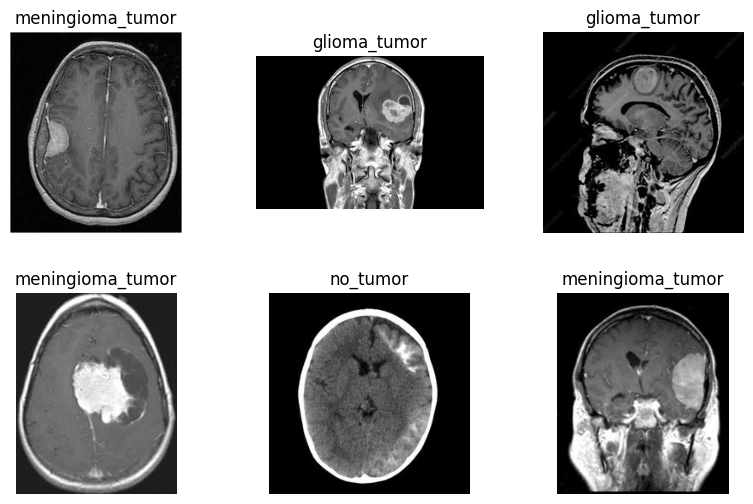

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
main_folder = '/content/brain-tumor-classification-mri/Testing'
class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
for ax in axes.ravel():
    class_label = random.choice(class_labels)
    class_folder = os.path.join(main_folder, class_label)
    image_files = os.listdir(class_folder)
    random_image = random.choice(image_files)
    image_path = os.path.join(class_folder, random_image)
    image = Image.open(image_path)
    ax.imshow(image)
    ax.set_title(class_label)
    ax.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()


In [ ]:

# Set hyperparameters
batch_size = 32
epochs = 20




In [ ]:
# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # VGG16 and ResNet50 input size
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)




Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


In [ ]:
# Create and compile VGG16 model
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_vgg16 = Sequential([
    base_model_vgg16,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])





In [ ]:
# Create and compile ResNet50 model
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_resnet50 = Sequential([
    base_model_resnet50,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])
model_resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Train the models
history_vgg16 = model_vgg16.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/20
72/72 [==============================] - 53s 659ms/step - loss: 1.4903 - accuracy: 0.2978 - val_loss: 1.3426 - val_accuracy: 0.3717
Epoch 2/20
72/72 [==============================] - 47s 654ms/step - loss: 1.2980 - accuracy: 0.3670 - val_loss: 1.3093 - val_accuracy: 0.3089
Epoch 3/20
72/72 [==============================] - 50s 695ms/step - loss: 1.2520 - accuracy: 0.4014 - val_loss: 1.2568 - val_accuracy: 0.4084
Epoch 4/20
72/72 [==============================] - 46s 634ms/step - loss: 1.2422 - accuracy: 0.4079 - val_loss: 1.2399 - val_accuracy: 0.4241
Epoch 5/20
72/72 [==============================] - 47s 646ms/step - loss: 1.1591 - accuracy: 0.4528 - val_loss: 1.2162 - val_accuracy: 0.4695
Epoch 6/20
72/72 [==============================] - 48s 661ms/step - loss: 1.1288 - accuracy: 0.4819 - val_loss: 1.2811 - val_accuracy: 0.3997
Epoch 7/20
72/72 [==============================] - 46s 632ms/step - loss: 1.1040 - accuracy: 0.5024 - val_loss: 1.2712 - val_accuracy: 0.5026

In [ ]:
history_resnet50 = model_resnet50.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/20
72/72 [==============================] - 83s 649ms/step - loss: 0.9632 - accuracy: 0.6613 - val_loss: 38.1912 - val_accuracy: 0.2880
Epoch 2/20
72/72 [==============================] - 49s 680ms/step - loss: 0.5385 - accuracy: 0.7980 - val_loss: 4.4422 - val_accuracy: 0.2862
Epoch 3/20
72/72 [==============================] - 44s 612ms/step - loss: 0.4142 - accuracy: 0.8463 - val_loss: 4.4865 - val_accuracy: 0.1379
Epoch 4/20
72/72 [==============================] - 45s 629ms/step - loss: 0.3277 - accuracy: 0.8872 - val_loss: 4.9291 - val_accuracy: 0.1379
Epoch 5/20
72/72 [==============================] - 47s 659ms/step - loss: 0.2744 - accuracy: 0.9121 - val_loss: 8.3081 - val_accuracy: 0.1379
Epoch 6/20
72/72 [==============================] - 45s 627ms/step - loss: 0.2740 - accuracy: 0.9081 - val_loss: 2.9952 - val_accuracy: 0.1379
Epoch 7/20
72/72 [==============================] - 44s 609ms/step - loss: 0.2570 - accuracy: 0.9055 - val_loss: 8.9786 - val_accuracy: 0.137

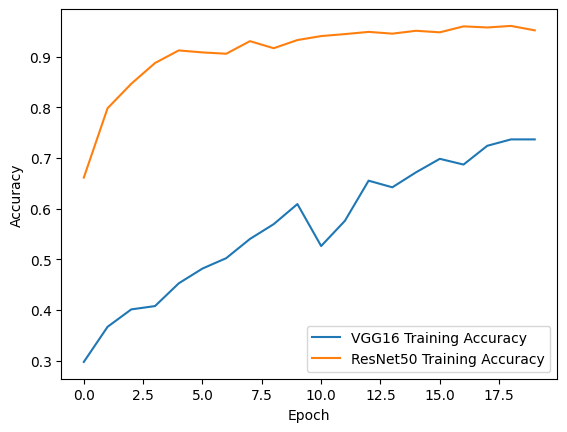

In [ ]:
# Plot training accuracy
plt.plot(history_vgg16.history['accuracy'], label='VGG16 Training Accuracy')
plt.plot(history_resnet50.history['accuracy'], label='ResNet50 Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()